### Download Necessary Files

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [2]:
import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

import warnings

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

resp = nsfg.ReadFemResp()

warnings.filterwarnings("ignore")

/home/surenther/Learning/EDA/Week4/nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
/home/surenther/Learning/EDA/Week4/nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

### Excercise 3.1

#### Actual NSFG respondent

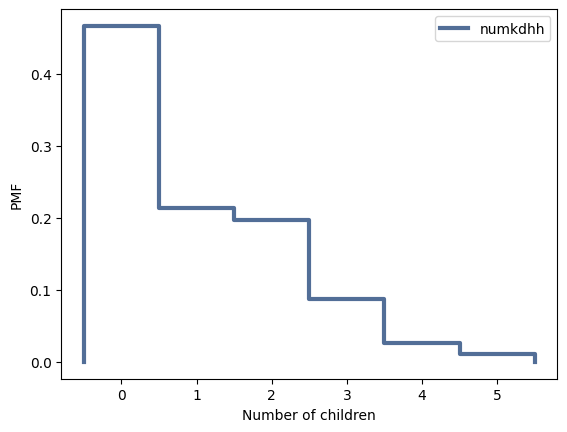

In [3]:
pmf = thinkstats2.Pmf(resp.numkdhh,label="numkdhh")

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

#### Biased NSFG respondent

In [4]:
#BiasPmf function creation

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [5]:
biased = BiasPmf(pmf, label="biased")

#### Ploatting Actual and Biased NSFG

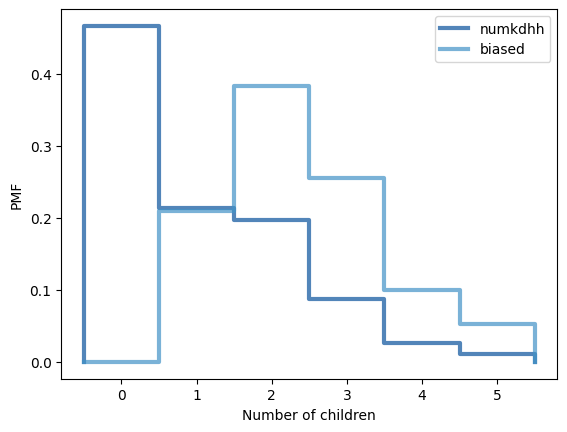

In [6]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

Interpretation:

    Actual Distribution (numkdhh):
        The highest probability occurs for households with no children, indicating that the majority of households have zero children.
        The probabilities steadily decline as the number of children increases, showing that larger households are less common.

    Biased Distribution (biased):
        The biased PMF gives greater weight to households with more children. This happens because the bias accounts for the perspective of individuals experiencing larger households (similar to the class size paradox).
        For example, households with two or three children have noticeably higher probabilities in the biased distribution compared to the actual distribution.

### Excercise 3.2

#### PmfMean function

In [7]:
def PmfMean(pmf):
    mean = sum(val * prob for val, prob in pmf.Items())
    return mean    

In [8]:
PmfMean(pmf)

1.024205155043831

#### PmfVar function

In [9]:
def PmfVar(pmf):
    mean = PmfMean(pmf)
    variance = sum(prob * (val - mean) ** 2 for val, prob in pmf.Items())
    return variance

In [10]:
PmfVar(pmf)

1.4128643263531195

#### Mean and variance comparision

In [12]:
#Mean using function
Actual_mean = PmfMean(pmf)
Biased_mean = PmfMean(biased)

print("Actual Mean:", Actual_mean)
print("Biased Mean:", Biased_mean)

Actual Mean: 1.024205155043831
Biased Mean: 2.403679100664282


In [13]:
#Variance using function
Actual_mean = PmfVar(pmf)
Biased_mean = PmfVar(biased)

print("Actual Variance:", Actual_mean)
print("Biased Variance:", Biased_mean)

Actual Variance: 1.4128643263531195
Biased Variance: 1.1732721055059874


In [15]:
#Mean using inbuild function
print("Actual Mean:", pmf.Mean())
print("Biased Mean:", biased.Mean())

Actual Mean: 1.024205155043831
Biased Mean: 2.403679100664282


In [16]:
#Variance using inbuild function
print("Actual Variance:", pmf.Var())
print("Biased Variance:", biased.Var())

Actual Variance: 1.4128643263531195
Biased Variance: 1.1732721055059874


### Excercise 4.1

#### Identifying first babies details

In [19]:
live, firsts, others = first.MakeFrames()

#### I am first child. So, taking CDF of first babies weight

In [21]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb)

#### My birthweight is 3.5kg. Which is 7.7 lbs

In [24]:
print("My perceintile Rank compared to first babies:",first_cdf.PercentileRank(7.7))

My perceintile Rank compared to first babies: 66.10130644052258


### Excercise 4.2

#### Create Random numbers

In [25]:
random_no = np.random.random(1000)

### Find PMF and plot it for random no

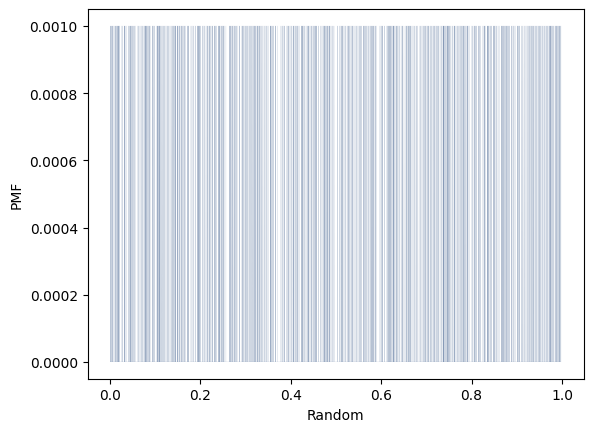

In [28]:
pmf = thinkstats2.Pmf(random_no)
thinkplot.Pmf(pmf,linewidth=0.05)
thinkplot.Config(xlabel='Random', ylabel='PMF')

This PMF distribution looks uniform

#### Find CDF and Plot it for random no

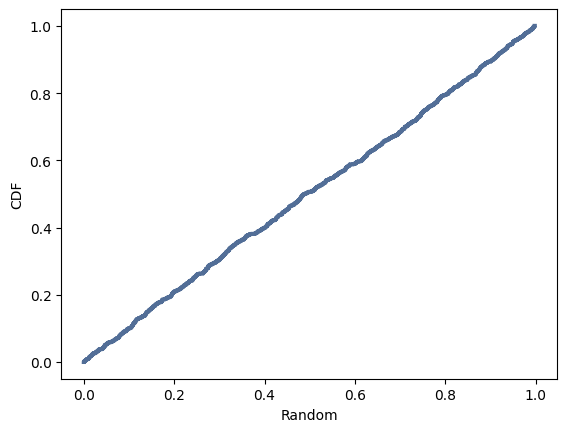

In [29]:
cdf = thinkstats2.Cdf(random_no)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random', ylabel='CDF')

This CDF distribution looks uniform